#**NHẬN DIỆN KHUÔN MẶT DÙNG CNN**

**Load thư viện**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

**Liên kết drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Tạo tập train, validation và test**

In [3]:
train_dataset = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

**Gắn giá trị vào tập train, validation và test**

In [4]:
training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Python/BTVN3/CNN_NhanDienKhuonMat/TrainMyFace/Train',
                        target_size=(150, 150),
                        batch_size=30,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_NhanDienKhuonMat/TrainMyFace/Validation",
                         target_size=(150, 150),
                          batch_size=30,
                         class_mode="categorical")
test_generator = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_NhanDienKhuonMat/TrainMyFace/Test",
                         target_size=(150, 150),
                          batch_size=30,
                         class_mode="categorical")

Found 60 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


**Kiểm tra nhãn**

In [5]:
training_generator.class_indices

{'AnhKhac': 0, 'NguyenXuanViet': 1}

**Tạo mô hình**

In [7]:
#CNN
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#ANN
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [8]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
from keras.backend import categorical_crossentropy
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Chạy mô hình**

In [9]:
history = model.fit(training_generator,batch_size=20,epochs=30,verbose=1,validation_data=validation_generator)

Epoch 1/30
2/2 [==============================] - 50s 12s/step - loss: 1.4959 - accuracy: 0.7000 - val_loss: 2.5725 - val_accuracy: 0.3333
Epoch 2/30
2/2 [==============================] - 1s 794ms/step - loss: 1.5574 - accuracy: 0.4500 - val_loss: 0.5719 - val_accuracy: 0.6667
Epoch 3/30
2/2 [==============================] - 1s 798ms/step - loss: 0.4786 - accuracy: 0.7833 - val_loss: 0.4302 - val_accuracy: 0.8667
Epoch 4/30
2/2 [==============================] - 1s 844ms/step - loss: 0.4579 - accuracy: 0.8000 - val_loss: 0.6120 - val_accuracy: 0.5333
Epoch 5/30
2/2 [==============================] - 1s 801ms/step - loss: 1.5150 - accuracy: 0.6500 - val_loss: 0.8073 - val_accuracy: 0.6667
Epoch 6/30
2/2 [==============================] - 1s 877ms/step - loss: 0.8522 - accuracy: 0.7500 - val_loss: 0.5115 - val_accuracy: 0.6667
Epoch 7/30
2/2 [==============================] - 1s 816ms/step - loss: 0.4864 - accuracy: 0.8000 - val_loss: 0.5034 - val_accuracy: 0.6667
Epoch 8/30
2/2 [=====

**Lưu mô hình**

In [10]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienKhuonMat.h5')


**Tải mô hình**

In [11]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienKhuonMat.h5')

**Vẽ biểu đồ độ chính xác**

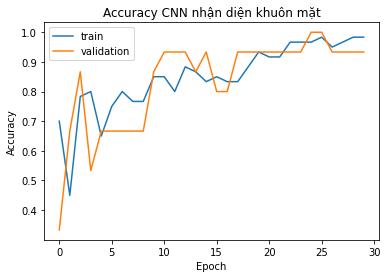

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy CNN nhận diện khuôn mặt')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Kiểm tra, dự đoán kết quả**

*Thêm thư viện*

In [13]:
#Load thư viện
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

*Kiểm tra tập test từ model*

In [14]:
result=np.argmax(model.predict(test_generator),axis=1)
result

array([1, 1, 0, 0, 0])

*Tải ảnh từ bên ngoài*

Không phải là bạn: Nguyễn Xuân Việt


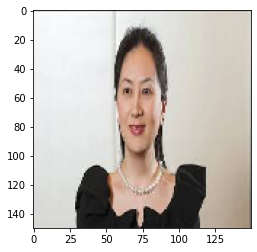

In [15]:
#Load ảnh lên
img=load_img('anhkhac1.jpg',target_size=(150,150,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 1:
    print("Đó là bạn: Nguyễn Xuân Việt")
else:
    print("Không phải là bạn: Nguyễn Xuân Việt")

Đó là bạn: Nguyễn Xuân Việt


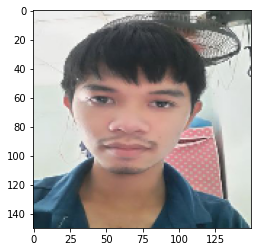

In [17]:
#Load ảnh lên
img=load_img('my.jpg',target_size=(150,150,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 1:
    print("Đó là bạn: Nguyễn Xuân Việt")
else:
    print("Không phải là bạn: Nguyễn Xuân Việt")

Đó là bạn: Nguyễn Xuân Việt


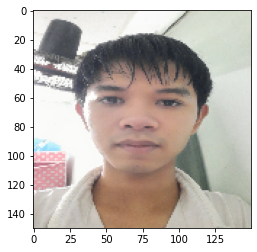

In [18]:
#Load ảnh lên
img=load_img('my2.jpg',target_size=(150,150,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 1:
    print("Đó là bạn: Nguyễn Xuân Việt")
else:
    print("Không phải là bạn: Nguyễn Xuân Việt")

Không phải là bạn: Nguyễn Xuân Việt


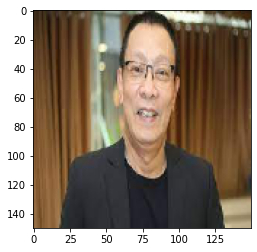

In [19]:
#Load ảnh lên
img=load_img('anhkhac2.jpg',target_size=(150,150,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 1:
    print("Đó là bạn: Nguyễn Xuân Việt")
else:
    print("Không phải là bạn: Nguyễn Xuân Việt")